<a href="https://colab.research.google.com/github/nabilaaaa24/Machine-Learning/blob/main/ML_Latihan_Modul_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.metrics import classification_report

## Persiapan Data

Load Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Prak ML/obesity_data.csv')

df

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight
...,...,...,...,...,...,...,...
995,18,Male,155.588674,64.103182,26.480345,4,Overweight
996,35,Female,165.076490,97.639771,35.830783,1,Obese
997,49,Female,156.570956,78.804284,32.146036,1,Obese
998,64,Male,164.192222,57.978115,21.505965,4,Normal weight


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


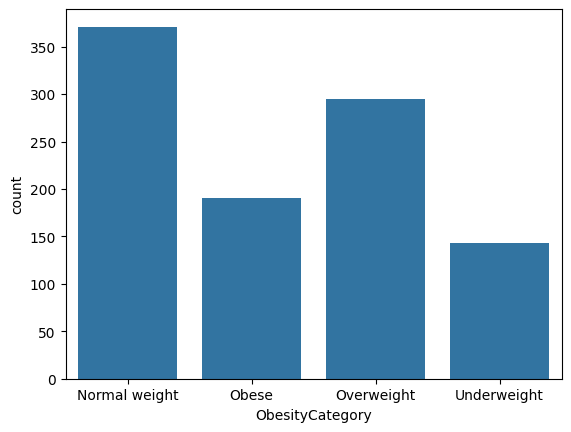

In [ ]:
sns.countplot(x='ObesityCategory', data=df)
plt.show()

Encode kolom kategorikal 'Gender'

In [ ]:
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])

Pisahkan fitur dan target

In [ ]:
X = df.drop('ObesityCategory', axis=1)
y = df['ObesityCategory']

Encode kolom kategorikal 'ObesityCategory'

In [ ]:
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])

le_obesity = LabelEncoder()
y_encoded = le_obesity.fit_transform(y)

# Convert the target to categorical (one-hot encoded)
y_categorical = to_categorical(y_encoded)

Data Train dan Data Test

In [ ]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

## Bangun Model Neural Network

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu')) # Input layer dengan 1 input dan 16 neurons
model.add(Dense(8, activation='relu'))                              # Hidden layer dengan 8 neurons
model.add(Dense(y_categorical.shape[1], activation='softmax'))      # Output layer dengan masalah multi-kelas, mengubah output menjadi distribusi probabilitas yang menjumlahkan satu

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              36 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 854 (3.34 KB)

 Trainable params: 284 (1.11 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 570 (2.23 KB)

## Melatih Model

In [ ]:
# Latih model
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

Epoch 1/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2886 - loss: 1.4514 - val_accuracy: 0.4437 - val_loss: 1.2313
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4818 - loss: 1.1779 - val_accuracy: 0.5938 - val_loss: 1.0310
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6120 - loss: 1.0032 - val_accuracy: 0.7125 - val_loss: 0.8662
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7135 - loss: 0.8517 - val_accuracy: 0.7437 - val_loss: 0.7512
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7586 - loss: 0.7344 - val_accuracy: 0.7875 - val_loss: 0.6675
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8052 - loss: 0.6698 - val_accuracy: 0.8062 - val_loss: 0.5975
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8798 - loss: 0.5579 - val_accuracy: 0.8250 - val_loss: 0.5387
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8890 - loss: 0.5058 - val_accuracy: 0.8438 - val_loss:

## Evaluasi Model

In [ ]:
# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Akurasi: {accuracy * 100:.2f}%')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9469 - loss: 0.1249  
Akurasi: 95.50%


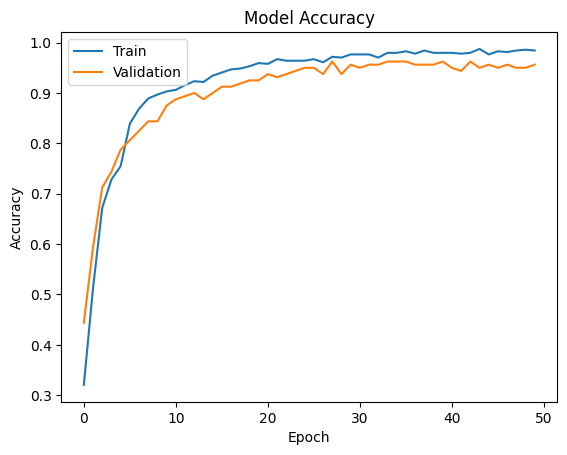

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

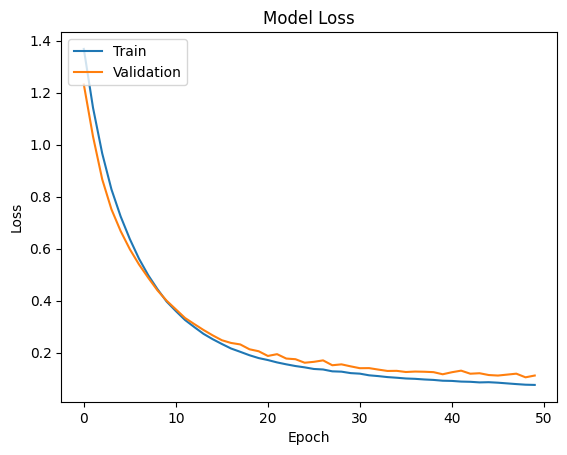

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Prediksi
y_pred = model.predict(X_test)
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

print(classification_report(y_test_labels, y_pred_labels, target_names=le_obesity.classes_))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
               precision    recall  f1-score   support

Normal weight       0.96      0.96      0.96        72
        Obese       0.94      0.97      0.95        32
   Overweight       0.95      0.94      0.95        65
  Underweight       0.97      0.97      0.97        31

     accuracy                           0.95       200
    macro avg       0.95      0.96      0.96       200
 weighted avg       0.96      0.95      0.95       200

